In [1]:
import os
import sys
# SRC_DIR environment variable should be the absolute path to the 'multicopy-STR-genotyping' directory
sys.path.append(os.environ["SRC_DIR"])

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from multicopy_STR_genotyping import file_io

sns.set_context("poster")
%matplotlib inline

In [3]:
np.tile(["filtered", "unfiltered"], 2)
np.repeat(["filtered", "unfiltered"], 2)

array(['filtered', 'filtered', 'unfiltered', 'unfiltered'], dtype='<U10')

In [4]:
df = pd.DataFrame({
    "depth": np.repeat(["10X", "30X", "100X"], 2),
    "filtered": np.tile(["filtered", "unfiltered"], 3),
    "total": [1695865] * 6,
    "estimated": [np.nan, 1544671, np.nan, np.nan, 1393426, 1671143],
    "correct": [np.nan, 1400650, np.nan, np.nan, 1369471, 1581068],
}).assign(
    incorrect = lambda x: x["estimated"] - x["correct"],
    missed = lambda x: x["total"] - x["estimated"]
).drop("total", axis=1)

df = df.melt(id_vars=["depth", "filtered"], var_name="segment", value_name="n")
df

,depth,filtered,segment,n
0,10X,filtered,estimated,NaN
1,10X,unfiltered,estimated,1544671.0
2,30X,filtered,estimated,NaN
3,30X,unfiltered,estimated,NaN
4,100X,filtered,estimated,1393426.0
5,100X,unfiltered,estimated,1671143.0
6,10X,filtered,correct,NaN
7,10X,unfiltered,correct,1400650.0
8,30X,filtered,correct,NaN
9,30X,unfiltered,correct,NaN


In [53]:
total = 1695865

df = pd.DataFrame({
    "approach": ["10X filtered", "10X unfiltered", "30X filtered", "30X unfiltered", "100X filtered", "100X unfiltered"],
    "filtered": np.tile(["filtered", "unfiltered"], 3),
    "depth": np.repeat(["10x", "30x", "100x"], 2),
    "estimated": [1351934, 1544671, 1410235, 1630656, 1393426, 1671143],
    "correct": [1257789, 1400650, 1363044, 1525318, 1369471, 1581068],
}).assign(
    incorrect = lambda x: x["estimated"] - x["correct"],
    missed = lambda x: 1695865 - x["estimated"],
    frac_called = lambda x: x["estimated"] / total,
    frac_incorrect = lambda x: x["incorrect"] / (x["incorrect"] + x["correct"]),
    frac_correct = lambda x: 1 - x["frac_incorrect"]
).drop(["estimated"], axis=1)

# df = df.melt(id_vars=["approach"], var_name="segment", value_name="n")
# df = df / total
df

,approach,filtered,depth,correct,incorrect,missed,frac_called,frac_incorrect,frac_correct
0,10X filtered,filtered,10x,1257789,94145,343931,0.797194,0.069637,0.930363
1,10X unfiltered,unfiltered,10x,1400650,144021,151194,0.910845,0.093237,0.906763
2,30X filtered,filtered,30x,1363044,47191,285630,0.831573,0.033463,0.966537
3,30X unfiltered,unfiltered,30x,1525318,105338,65209,0.961548,0.064599,0.935401
4,100X filtered,filtered,100x,1369471,23955,302439,0.821661,0.017191,0.982809
5,100X unfiltered,unfiltered,100x,1581068,90075,24722,0.985422,0.053900,0.946100


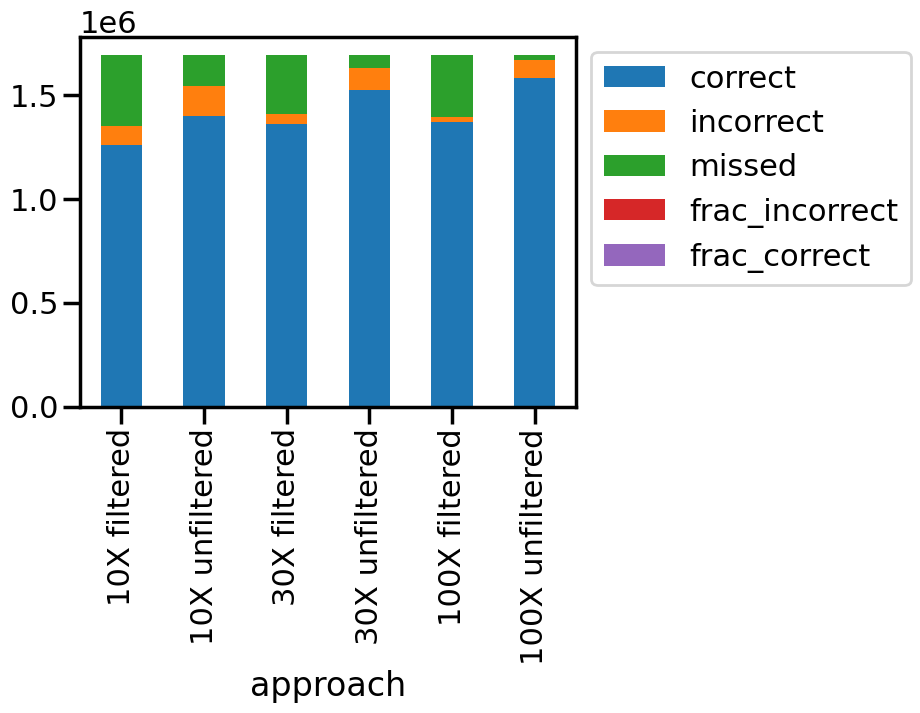

In [24]:
ax = df.set_index("approach").plot(kind="bar", stacked=True)

ax.set(
    ylim = (0, 1.05*ax.get_ylim()[1])
)

_ = ax.get_legend().set(bbox_to_anchor=(1, 1))

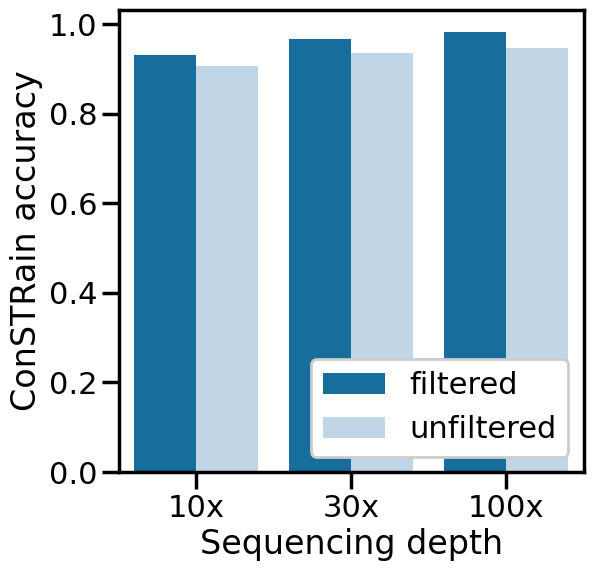

In [52]:
fig = plt.figure(figsize=(6, 6))
pl = [sns.color_palette("colorblind")[0], sns.color_palette("Blues")[1]]
ax = sns.barplot(
    df,
    x="depth",
    y="frac_correct",
    hue="filtered",
    palette=pl
)

sns.move_legend(ax, "lower right")
_ = ax.get_legend().set(title="")
_ = ax.get_legend().get_frame().set_alpha(1)
_ = ax.set(
    xlabel="Sequencing depth",
    ylabel="ConSTRain accuracy",    
)